# Data analysis on thermal phase 2+1D CDT

Author: Seda den Boer

Date: 04/04/2024

In [76]:
# Load packages
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

## Experiment parameters

In [609]:
chains = 16
k0_values = np.arange(0.0, 8.0, 1.0)
T = 10
thermal_sweeps = 1000
sweeps = 0
target_volume = 3000
ksteps = 300000

# k0 to make plots for
k0 = 7.0

## $k_3$

### Critical $k_3$

In [610]:
last_k3 = {k: [] for k in k0_values}

for k in k0_values:
    path = f'thermal_{target_volume}/T{T}/measurements/k0={k}'
    filepaths = glob.glob(f'{path}/*k3_values.npy')
    for file in filepaths:
        
        # print(file)
        k3_values = np.load(file)

        # Get final value in the dataset
        last_k3[k].append(k3_values[-1])


# Make it a df 
df_critical_k3 = pd.DataFrame(last_k3).T
df_critical_k3.index.name = 'k0'
df_critical_k3.columns.name = 'chain'
df_critical_k3['mean'] = df_critical_k3.mean(axis=1)
df_critical_k3['std'] = df_critical_k3.std(axis=1)
df_critical_k3

chain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,mean,std
k0,,,,,,,,,,,,,,,,,,
0.0,0.95264,0.95408,0.95160,0.96192,0.95256,0.95952,0.96406,0.95830,0.95464,0.95512,0.96176,0.96266,0.95904,0.95100,0.96036,0.95636,0.957226,0.004133
1.0,1.08416,1.08256,1.08438,1.09338,1.08432,1.07364,1.09118,1.09062,1.08318,1.08456,1.08768,1.09096,1.09440,1.07982,1.08492,1.08924,1.086188,0.005204
2.0,1.21414,1.22442,1.22458,1.22436,1.22218,1.23348,1.21906,1.22442,1.22740,1.22310,1.21750,1.21600,1.22316,1.22738,1.22108,1.22616,1.223026,0.004639
3.0,1.37096,1.37658,1.36958,1.37478,1.37732,1.37588,1.37342,1.37366,1.37156,1.37172,1.37252,1.36772,1.36468,1.37612,1.37406,1.36978,1.372521,0.003336
4.0,1.52690,1.52842,1.52464,1.52332,1.52710,1.53086,1.53898,1.53098,1.53566,1.53020,1.53192,1.52072,1.54024,1.53594,1.52694,1.53182,1.530290,0.005301
5.0,1.70828,1.71208,1.70684,1.69774,1.70672,1.70334,1.70044,1.70766,1.70702,1.70376,1.70658,1.70728,1.70332,1.70188,1.70820,1.70774,1.705555,0.003439
6.0,1.89648,1.89212,1.89494,1.89690,1.89570,1.89498,1.89680,1.89316,1.89516,1.89758,1.89356,1.89192,1.89526,1.89302,1.89522,1.89072,1.894595,0.001923
7.0,2.14190,2.14054,2.14080,2.14146,2.14202,2.14236,2.14256,2.14446,2.14020,2.14330,2.14250,2.14214,2.14258,2.14096,2.14206,2.14320,2.142065,0.001071


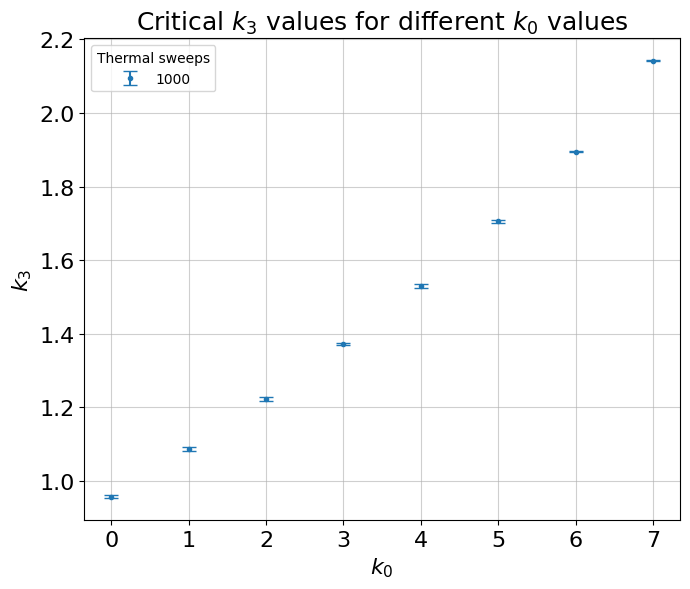

In [611]:
# Plot critical k3 with markers and interpolated line
plt.figure(figsize=(7, 6))
plt.errorbar(df_critical_k3.index, df_critical_k3['mean'], yerr=df_critical_k3['std'], fmt='.', capsize=5, xerr=None, label=1000)
plt.title('Critical $k_3$ values for different $k_0$ values', fontsize=18)
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('$k_3$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Thermal sweeps', fancybox=True)
plt.tight_layout()
savepath = f'plots/k3_tuning/T{T}_critical_k3_values_tswps={thermal_sweeps}.png'
if not os.path.exists('plots/k3_tuning'):
    os.makedirs('plots/k3_tuning')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

### $k_3$ over time

In [612]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_k3 = glob.glob(f'{path}/*k3_values.npy')
k3_values = []
for filepath in filepaths_k3:
    k3_values.append(np.load(filepath))

# Make it a df to plot easily the mean and std
df_k3 = pd.DataFrame(k3_values)
# make a column for chain, sweep and the values k3
df_k3 = df_k3.melt(var_name='sweep', value_name='k3', ignore_index=False).reset_index()
# Increase sweep number by 1
df_k3['sweep'] += 1
df_k3

,index,sweep,k3
0,0,1,2.20000
1,1,1,2.20000
2,2,1,2.20000
3,3,1,2.20000
4,4,1,2.20000
...,...,...,...
15995,11,1000,2.14214
15996,12,1000,2.14258
15997,13,1000,2.14096
15998,14,1000,2.14206


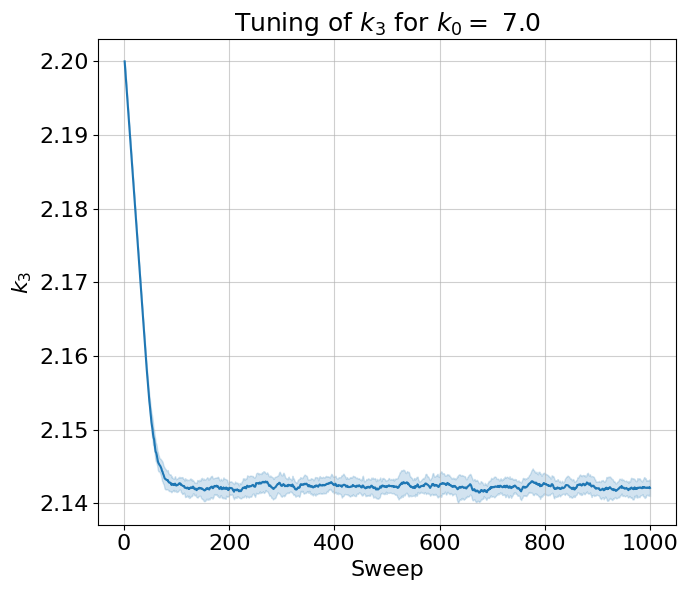

In [613]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_k3, x='sweep', y='k3', errorbar='sd')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('$k_3$', fontsize=16)
plt.title(f'Tuning of $k_3$ for $k_0=$ {k0}', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/k3_tuning/T{T}_k3_tuning_k0={k0}_tswps={thermal_sweeps}.png'
if not os.path.exists('plots/k3_tuning'):
    os.makedirs('plots/k3_tuning')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

## Acceptance ratios

In [614]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_ar = glob.glob(f'{path}/*acceptance_ratios.npy')
ar_add = []
ar_delete = []
ar_flip = []
ar_shift = []
ar_ishift = []

for filepath in filepaths_ar:
    ar = np.load(filepath)
    ar_add.append(ar[:, 0])
    ar_delete.append(ar[:, 1])
    ar_flip.append(ar[:, 2])
    ar_shift.append(ar[:, 3])
    ar_ishift.append(ar[:, 4])

# Make it a df to plot easily the mean and std
df_ar_add = pd.DataFrame(ar_add)
df_ar_delete = pd.DataFrame(ar_delete)
df_ar_flip = pd.DataFrame(ar_flip)
df_ar_shift = pd.DataFrame(ar_shift)
df_ar_ishift = pd.DataFrame(ar_ishift)

# Make a column for chain, sweep and the values ar
df_ar_add = df_ar_add.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_delete = df_ar_delete.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_flip = df_ar_flip.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_shift = df_ar_shift.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_ishift = df_ar_ishift.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()

# Increase sweep number by 1
df_ar_add['sweep'] += 1
df_ar_delete['sweep'] += 1
df_ar_flip['sweep'] += 1
df_ar_shift['sweep'] += 1
df_ar_ishift['sweep'] += 1

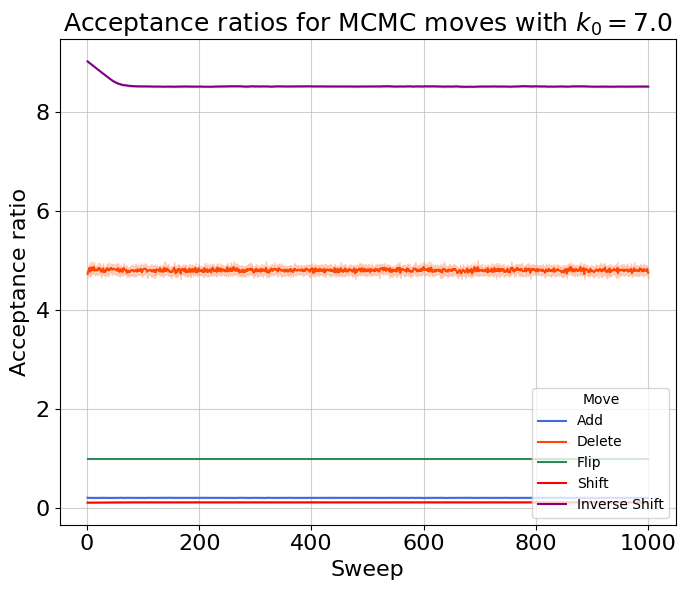

In [615]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_ar_add, x='sweep', y='ar', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_ar_delete, x='sweep', y='ar', errorbar='sd', label='Delete', color='orangered')
sns.lineplot(data=df_ar_flip, x='sweep', y='ar', errorbar='sd', label='Flip', color='seagreen')
sns.lineplot(data=df_ar_shift, x='sweep', y='ar', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_ar_ishift, x='sweep', y='ar', errorbar='sd', label='Inverse Shift', color='purple')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Acceptance ratio', fontsize=16)
plt.title(f'Acceptance ratios for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='lower right')
plt.tight_layout()
savepath = f'plots/acceptance_ratios/T{T}_acceptance_ratios_k0={k0}_tswps={thermal_sweeps}.png'
if not os.path.exists('plots/acceptance_ratios'):
    os.makedirs('plots/acceptance_ratios')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


### Zoom-in

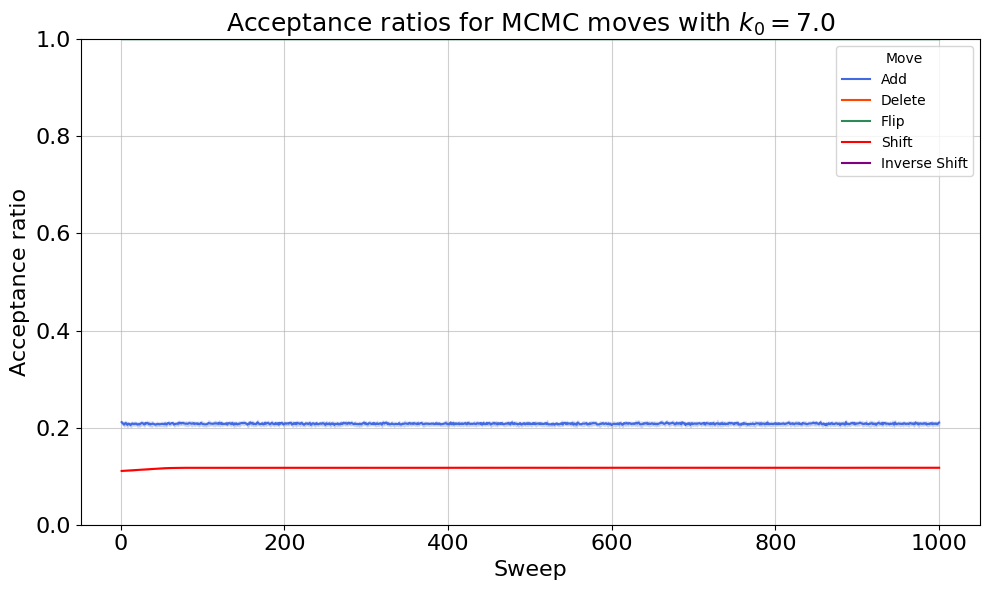

In [616]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ar_add, x='sweep', y='ar', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_ar_delete, x='sweep', y='ar', errorbar='sd', label='Delete', color='orangered')
sns.lineplot(data=df_ar_flip, x='sweep', y='ar', errorbar='sd', label='Flip', color='seagreen')
sns.lineplot(data=df_ar_shift, x='sweep', y='ar', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_ar_ishift, x='sweep', y='ar', errorbar='sd', label='Inverse Shift', color='purple')
plt.ylim(0, 1)
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Acceptance ratio', fontsize=16)
plt.title(f'Acceptance ratios for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='upper right')
plt.tight_layout()
savepath = f'plots/acceptance_ratios/zoomin_T{T}_acceptance_ratios_k0={k0}_tswps={thermal_sweeps}.png'
if not os.path.exists('plots/acceptance_ratios'):
    os.makedirs('plots/acceptance_ratios')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


## Succes rates

In [617]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_successes = glob.glob(f'{path}/*successes.npy')
filepath_fails = glob.glob(f'{path}/*fails.npy')

sr_add = []
sr_delete = []
sr_flip = []
sr_shift = []
sr_ishift = []

for i in range(chains):
    successes = np.load(filepaths_successes[i])
    fails = np.load(filepath_fails[i])
    sr_add.append(successes[:, 0] / (successes[:, 0] + fails[:, 0]))
    sr_delete.append(successes[:, 1] / (successes[:, 1] + fails[:, 1]))
    sr_flip.append(successes[:, 2] / (successes[:, 2] + fails[:, 2]))
    sr_shift.append(successes[:, 3] / (successes[:, 3] + fails[:, 3]))
    sr_ishift.append(successes[:, 4] / (successes[:, 4] + fails[:, 4]))

# Make it a df to plot easily the mean and std
df_sr_add = pd.DataFrame(sr_add)
df_sr_delete = pd.DataFrame(sr_delete)
df_sr_flip = pd.DataFrame(sr_flip)
df_sr_shift = pd.DataFrame(sr_shift)
df_sr_ishift = pd.DataFrame(sr_ishift)

# Make a column for chain, sweep and the values sr
df_sr_add = df_sr_add.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_delete = df_sr_delete.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_flip = df_sr_flip.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_shift = df_sr_shift.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_ishift = df_sr_ishift.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()

# Increase sweep number by 1
df_sr_add['sweep'] += 1
df_sr_delete['sweep'] += 1
df_sr_flip['sweep'] += 1
df_sr_shift['sweep'] += 1
df_sr_ishift['sweep'] += 1

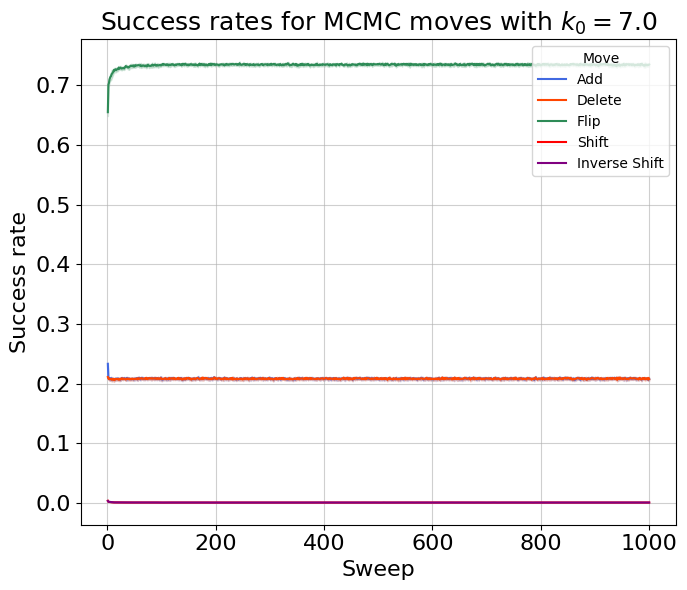

In [618]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd', label='Delete', color='orangered')
sns.lineplot(data=df_sr_flip, x='sweep', y='sr', errorbar='sd', label='Flip', color='seagreen')
sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd', label='Inverse Shift', color='purple')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate', fontsize=16)
plt.title(f'Success rates for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='upper right')
plt.tight_layout()
savepath = f'plots/success_rates/T{T}_success_rates_k0={k0}_tswps={thermal_sweeps}.png'
if not os.path.exists('plots/success_rates'):
    os.makedirs('plots/success_rates')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


### Zoom-in

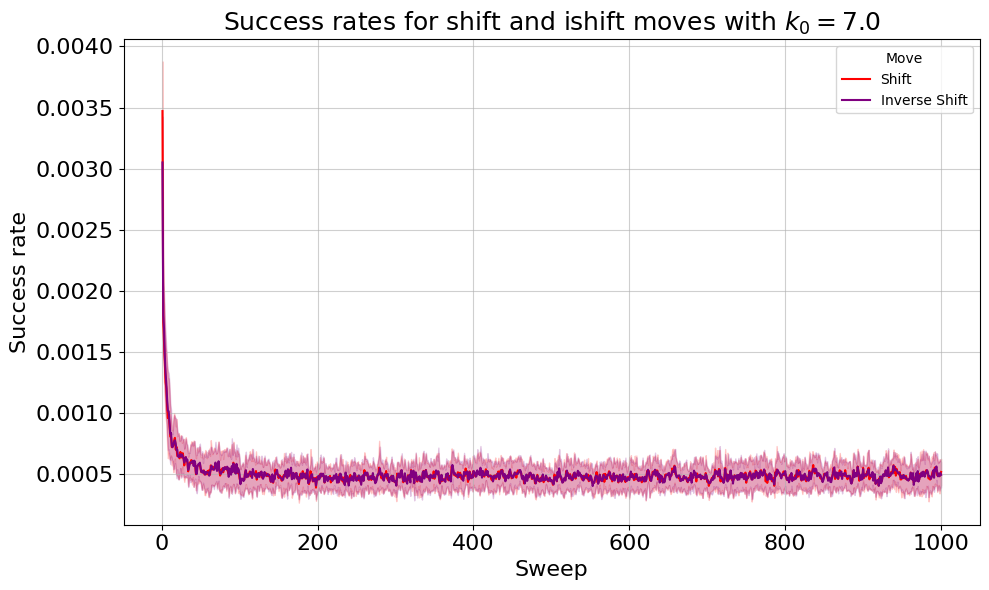

In [619]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd', label='Inverse Shift', color='purple')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate', fontsize=16)
plt.title(f'Success rates for shift and ishift moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True)
plt.tight_layout()
savepath = f'plots/success_rates/T{T}_shift_ishift_success_rates_k0={k0}_tswps={thermal_sweeps}.png'
if not os.path.exists('plots/success_rates'):
    os.makedirs('plots/success_rates')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


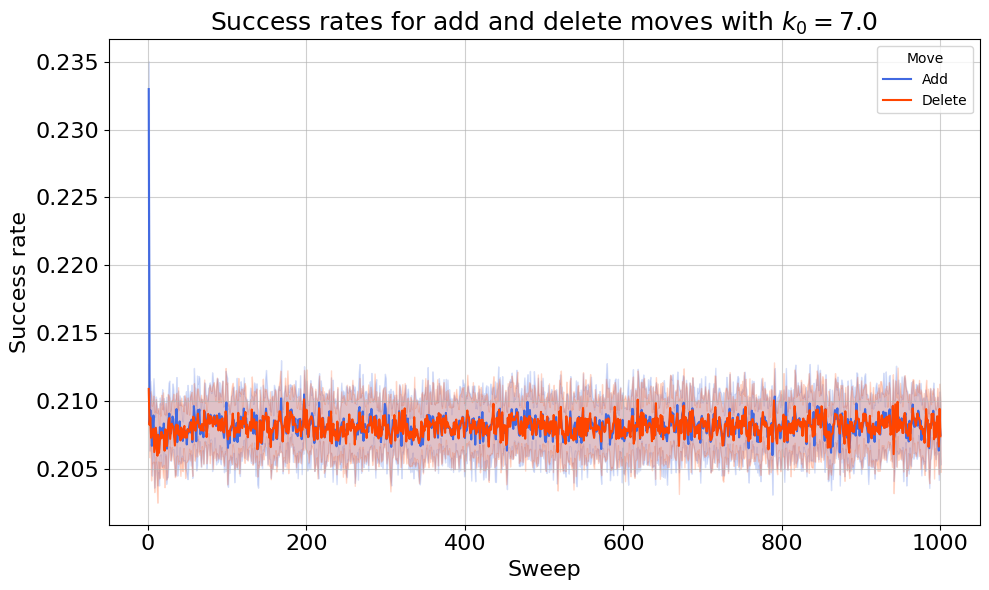

In [620]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd', label='Delete', color='orangered')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate', fontsize=16)
plt.title(f'Success rates for add and delete moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True)
plt.tight_layout()
savepath = f'plots/success_rates/T{T}_add_delete_success_rates_k0={k0}_tswps={thermal_sweeps}.png'
if not os.path.exists('plots/success_rates'):
    os.makedirs('plots/success_rates')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


## $<N_{22}/N_{31}>$

### Over time

In [621]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_n22 = glob.glob(f'{path}/*n_tetras_22.npy')
filepaths_n31 = glob.glob(f'{path}/*n_tetras_31.npy')

n22_n31 = []

for i in range(chains):
    n22 = np.load(filepaths_n22[i])
    n31 = np.load(filepaths_n31[i])
    n22_n31.append(n22 / n31)

# Make it a df to plot easily the mean and std
df_n22_n31 = pd.DataFrame(n22_n31)
df_n22_n31 = df_n22_n31.melt(var_name='sweep', value_name='n22/n31', ignore_index=False).reset_index()
df_n22_n31['sweep'] += 1
df_n22_n31

,index,sweep,n22/n31
0,0,1,1.000000
1,1,1,1.000000
2,2,1,1.000000
3,3,1,1.000000
4,4,1,1.000000
...,...,...,...
16011,11,1001,0.018164
16012,12,1001,0.010287
16013,13,1001,0.013831
16014,14,1001,0.012295


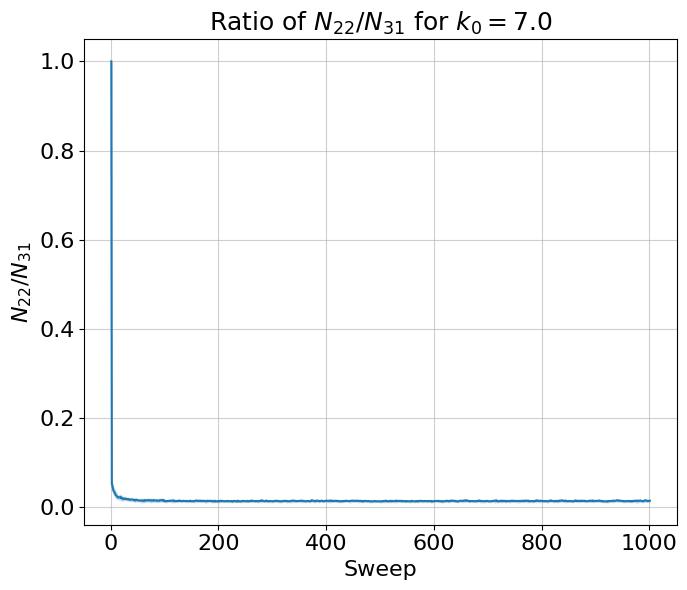

In [622]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_n22_n31, x='sweep', y='n22/n31', errorbar='sd')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('$N_{22}/N_{31}$', fontsize=16)
plt.title(f'Ratio of $N_{{22}}/N_{{31}}$ for $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/n22_n31/T{T}_n22_n31_k0={k0}_tswps={thermal_sweeps}.png'
if not os.path.exists('plots/n22_n31'):
    os.makedirs('plots/n22_n31')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

## Curvature

In [623]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_curvature = glob.glob(f'{path}/*curvature.npy')

avg_curvature = {chain: [] for chain in range(chains)}
std_curvature = {chain: [] for chain in range(chains)}
curvature = {}

for i in range(chains):
    curvature_data = np.load(filepaths_curvature[i], allow_pickle=True)
    final_added_values = []
    for data in curvature_data:
        added_values = []
        for key, value in data.items():
            # Add the values together in 1 list
            added_values += value

        # Calculate the average and std of the curvature
        avg_curvature[i].append(np.mean(added_values))
        std_curvature[i].append(np.std(added_values))
        

# Make it a df to plot easily the mean and std
df_avg_curvature = pd.DataFrame(avg_curvature).T
df_avg_curvature.index.name = 'chain'
df_avg_curvature.columns.name = 'sweep'
df_avg_curvature = df_avg_curvature.melt(var_name='sweep', value_name='avg_curvature', ignore_index=False).reset_index()
df_avg_curvature



,chain,sweep,avg_curvature
0,0,0,3.600000
1,1,0,3.600000
2,2,0,3.600000
3,3,0,3.600000
4,4,0,3.600000
...,...,...,...
16011,11,1000,5.919192
16012,12,1000,5.916609
16013,13,1000,5.919137
16014,14,1000,5.916551


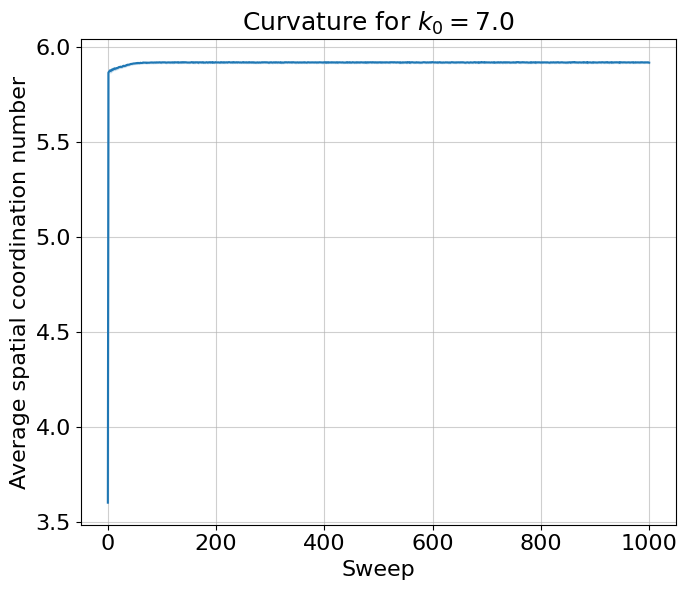

In [624]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_avg_curvature, x='sweep', y='avg_curvature', errorbar='sd')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Average spatial coordination number', fontsize=16)
plt.title(f'Curvature for $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/curvature/T{T}_curvature_k0={k0}_tswps={thermal_sweeps}.png'
if not os.path.exists('plots/curvature'):
    os.makedirs('plots/curvature')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

In [625]:
# Add all data for at each sweep together from each chain
tmp1 = []
for i in range(chains):
    curvature_data = np.load(filepaths_curvature[i], allow_pickle=True)
    added = []
    # print(curvature_data)

    for d in curvature_data:
        tmp2 = []
        for value in d.values():
            tmp2 += value
        added.append(tmp2)
    tmp1.append(added)

curvature = [list(sum(zip(*sublists), ())) for sublists in zip(*tmp1)]

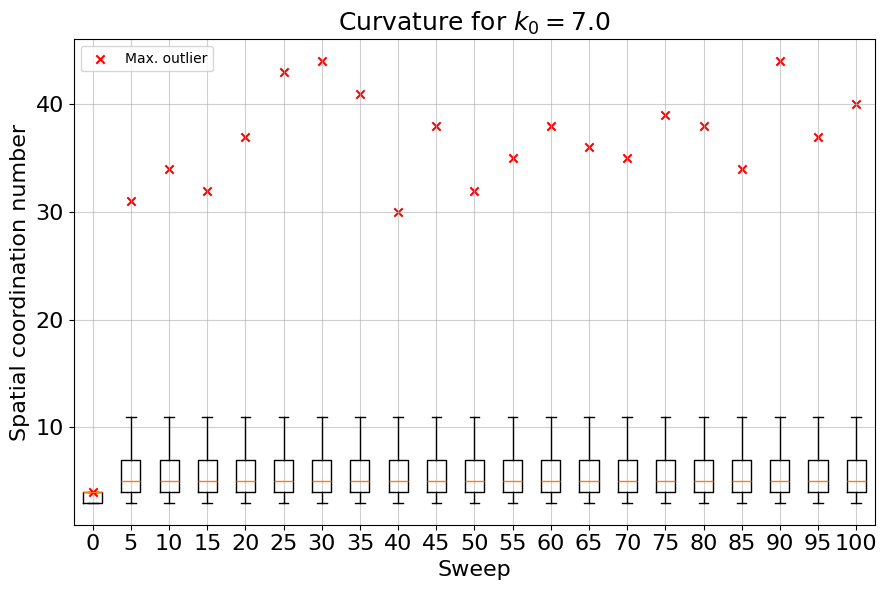

In [626]:
# Plot boxplots of the curvature for every 5 sweeps
sweeps_display = np.arange(0, 101, 5)
boxplot_data = [curvature[i] for i in sweeps_display]
plt.figure(figsize=(9, 6))
plt.boxplot(boxplot_data, showfliers=False)
# Manual plotting of maximum outliers
max_outliers = [np.max(data) for data in boxplot_data]
plt.scatter(np.arange(1, len(sweeps_display) + 1), max_outliers, marker='x', color='red', label='Max. outlier')
plt.xticks(range(1, len(sweeps_display) + 1), sweeps_display)
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Spatial coordination number', fontsize=16)
plt.title(f'Curvature for $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend()
plt.tight_layout()
savepath = f'plots/curvature/T{T}_curvature_boxplot_k0={k0}_tswps={thermal_sweeps}.png'
if not os.path.exists('plots/curvature'):
    os.makedirs('plots/curvature')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

## Spectral dimension